In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [574]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
Survived_train = train_df.Survived.copy()
train_no_survive = train_df.drop(['Survived'],axis = 1)
datagroup = [train_no_survive,test_df]

In [575]:
for dataset in datagroup:
    dataset['Age'] = dataset.Age.fillna(dataset.Age.mean())
    dataset['Title'] = dataset.Name.str.split(',',expand = True)[1].str.split('.',expand = True)[0].str.strip(' ')
    dataset['LastName'] = dataset.Name.str.split(',',expand = True)[0]
    dataset = pd.concat([dataset,pd.get_dummies(dataset['Sex'])],axis = 1)

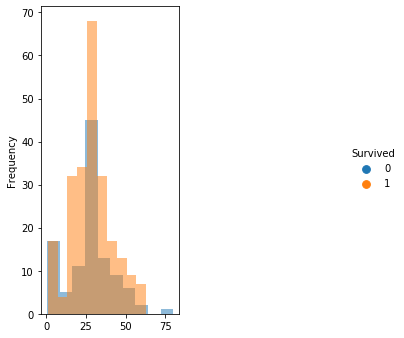

In [576]:
sns.catplot(x = 'Sex',y='Age',hue = 'Survived',data = train_df)

train_df = pd.read_csv('titanic/train.csv')
train_df['Age'] = train_df.Age.fillna(train_df['Age'].mean())
train_df = pd.concat([train_df,pd.get_dummies(train_df['Sex'])],axis = 1)
survived_male = train_df[(train_df['Survived']==1) & (train_df['male']==1)]
survived_female = train_df[(train_df['Survived'] == 1) & (train_df['female'] == 1)]
#train_df[train_df['Survived'] == 1 ].Age.plot.hist()
fig = plt.subplot(1,2,1)
survived_male.Age.plot.hist(alpha = 0.5)
survived_female.Age.plot.hist(alpha = 0.5)

In [577]:
man_title = ["Capt","Don","Major","Col","Rev","Dr","Sir","Mr","Jonkheer"]
woman_title = ["Dona","the Countess","Mme","Mlle","Ms","Miss","Lady","Mrs"]
man_map = {}
woman_map = {}
for title in man_title:
    man_map[title] = 'man'
for title in woman_title:
    woman_map[title] = 'woman'
for dataset in datagroup:
    dataset['Title'] = dataset['Title'].apply(lambda x:'man' if x in man_title else x)
    dataset['Title'] = dataset['Title'].apply(lambda x:'woman' if x in woman_title else x)
    dataset['Title'] = dataset['Title'].apply(lambda x:'boy' if x == 'Master' else x)

In [579]:
dataset = pd.concat([train_no_survive,test_df],axis = 0)
freqName = dataset.groupby('LastName').size()
dataset['LastNameFreq'] = dataset['LastName'].map(freqName)
dataset['LastName'] = np.where(dataset['Sex'] == 'male','NoGroup',dataset['LastName'])
dataset['LastName'] = np.where(dataset['LastNameFreq'] < 2, 'NoGroup', dataset['LastName'])

In [563]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,female,male,LastNameFreq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,NoGroup,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,Cumings,1,0,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,NoGroup,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,Futrelle,1,0,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,NoGroup,0,1,2


In [580]:
train_df = pd.concat([train_no_survive,Survived_train],axis = 1)
survivalRate = train_df.groupby('LastName').Survived.mean()
for dataset in datagroup:
    dataset['LastNameSurvival'] = dataset['LastName'].map(survivalRate)
#dataset.groupby('LastNameSurvival').size()

In [546]:
dataset['AdjustedSurival'] = (dataset['LastNameSurvival']*dataset['LastNameFreq'] - dataset['Survived'])/(dataset['LastNameFreq']-1)

In [582]:
for dataset in datagroup:
    print(dataset.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Title   LastName  LastNameSurvival  
0    man     Braund               0.0  
1  wom

In [585]:
test_df['LastNameSurvival'] = test_df['LastNameSurvival'].fillna(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,LastNameSurvival
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,man,Kelly,0.750000
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,woman,Wilkes,0.000000
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,man,Myles,0.000000
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,man,Wirz,0.000000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,woman,Hirvonen,1.000000
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,NaN,S,man,Svensson,0.000000
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,NaN,Q,woman,Connolly,1.000000
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,NaN,S,man,Caldwell,1.000000
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,NaN,C,woman,Abrahim,0.000000
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,NaN,S,man,Davies,0.333333


In [595]:
test_df['Survived'] = 0
test_df['Survived'] = np.where(test_df.Title == 'woman',1,0)
test_df['Survived'] = np.where(test_df.Title == 'boy' , 0 ,np.where(test_df.LastNameSurvival >0.9, 1, 0))
test_df['Survived'] = np.where(test_df.Title == 'woman', 1, np.where(test_df.LastNameSurvival < 0.9 ,0,1))

In [596]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId         418 non-null int64
Pclass              418 non-null int64
Name                418 non-null object
Sex                 418 non-null object
Age                 418 non-null float64
SibSp               418 non-null int64
Parch               418 non-null int64
Ticket              418 non-null object
Fare                417 non-null float64
Cabin               91 non-null object
Embarked            418 non-null object
Title               418 non-null object
LastName            418 non-null object
LastNameSurvival    418 non-null float64
Predict             418 non-null int64
Survived            418 non-null int64
dtypes: float64(3), int64(6), object(7)
memory usage: 52.3+ KB


In [597]:
prediction = pd.concat([test_df['PassengerId'],test_df['Survived']],axis = 1)
prediction.to_csv('titanic/wcg.csv' , index = False)